<a href="https://colab.research.google.com/github/96harsh52/Bank_name_identification/blob/main/banklogo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## file acess from drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
from matplotlib import pyplot as plt
from keras.layers import LayerNormalization
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l1_l2
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_width, img_height = 224,224
  
train_data_dir = '/content/drive/My Drive/Traning/'
validation_data_dir ='/content/drive/My Drive/Test/'


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, 
                                   samplewise_std_normalization=False,
                                   shear_range = 0.2,rotation_range=40,width_shift_range=0.1,height_shift_range=0.1,
                                   zoom_range=0.2, 
                                  vertical_flip=True,
                                   horizontal_flip = True,fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1.0/ 255)


train_generator = test_datagen.flow_from_directory(train_data_dir,target_size =(img_width, img_height), color_mode='rgba',
                     batch_size = 15,save_format='jpg', class_mode ='categorical',interpolation='nearest')
 
validation_generator = test_datagen.flow_from_directory( validation_data_dir, target_size =(img_width, img_height), color_mode='rgba',
                           batch_size = 15, class_mode ='categorical',interpolation='nearest') 

FileNotFoundError: ignored

In [ ]:
 if K.image_data_format() == 'channels_first': 
    input_shape = (4, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 4) 

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform', padding='same', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.5))


model.add(Conv2D(64, (3, 3), activation='LeakyReLU',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=-1, epsilon=0.001,moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(MaxPooling2D((2, 2))) 
# model.add(Dropout(0.5))


model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=-1, epsilon=0.001,moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=-1, epsilon=0.001,moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=-1, epsilon=0.001,moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=-1, epsilon=0.001,moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(25, activation='softmax'))


model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 32)      1184      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 56, 56, 64)       

In [ ]:
model.compile(loss ='categorical_crossentropy', 
                     optimizer ="Adam", 
                   metrics =['accuracy']) 

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10, verbose=1, mode='auto')

history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=25,
                              epochs=100,
                              validation_steps=25
                              )#callbacks = [callback]

Epoch 1/100
25/25 [==============================] - 273s 11s/step - loss: 170.0577 - accuracy: 0.0880 - val_loss: 148.4375 - val_accuracy: 0.0193
Epoch 2/100
25/25 [==============================] - 99s 4s/step - loss: 126.7703 - accuracy: 0.1760 - val_loss: 105.9338 - val_accuracy: 0.0220
Epoch 3/100
25/25 [==============================] - 171s 7s/step - loss: 89.5231 - accuracy: 0.2320 - val_loss: 76.3192 - val_accuracy: 0.0220
Epoch 4/100
25/25 [==============================] - 61s 2s/step - loss: 65.7966 - accuracy: 0.2610 - val_loss: 58.5395 - val_accuracy: 0.0689
Epoch 5/100
25/25 [==============================] - 5s 186ms/step - loss: 51.4736 - accuracy: 0.2773 - val_loss: 45.9540 - val_accuracy: 0.0331
Epoch 6/100
25/25 [==============================] - 4s 177ms/step - loss: 41.2148 - accuracy: 0.3173 - val_loss: 39.3442 - val_accuracy: 0.0303
Epoch 7/100
25/25 [==============================] - 5s 193ms/step - loss: 34.9511 - accuracy: 0.3132 - val_loss: 36.0470 - val_acc

In [ ]:
# model.save_weights('model_saved.h5') 

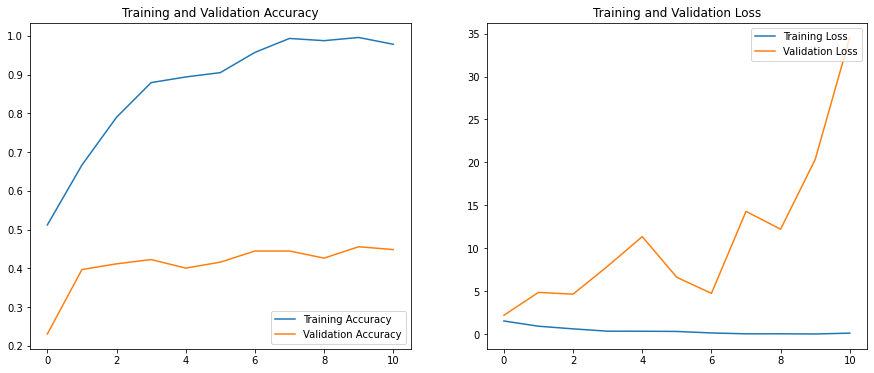

In [ ]:
import tensorflow as tf
from tensorflow import keras
import h5py

model.save('modelbank.h5')
loaded_model = keras.models.load_model('modelbank.h5')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(11)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

loaded_model = keras.models.load_model('modelbank.h5')

img = cv2.imread('/content/drive/My Drive/bb_04.jpg')
img = cv2.resize(img,(180,180))
img = np.reshape(img,[1,180,180,3])
classes = model.predict(img)
print(classes)
np.argmax(classes)


NameError: ignored

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

loaded_model = keras.models.load_model('modelbank.h5')

img = cv2.imread('/content/drive/My Drive/0.png')
img = cv2.resize(img,(180,180))
img = np.reshape(img,[1,180,180,3])
classes = model.predict(img)
print(classes)
np.argmax(classes)


[[0. 0. 0. 0. 0. 1. 0.]]


5

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

loaded_model = keras.models.load_model('modelbank.h5')

img = cv2.imread('/content/drive/My Drive/1024px-ICICI_Bank_Logo.svg.png')
img = cv2.resize(img,(180,180))
img = np.reshape(img,[1,180,180,3])
classes = model.predict(img)
print(classes)
np.argmax(classes)


[[0. 1. 0. 0. 0. 0. 0.]]


1

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

loaded_model = keras.models.load_model('modelbank.h5')

img = cv2.imread('/content/drive/My Drive/220px-IDBI_Federal_Life_Insurance.sv.png')
img = cv2.resize(img,(180,180))
img = np.reshape(img,[1,180,180,3])
classes = model.predict(img)
print(classes)
np.argmax(classes)


[[0. 1. 0. 0. 0. 0. 0.]]


1

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

loaded_model = keras.models.load_model('modelbank.h5')

img = cv2.imread('/content/drive/My Drive/img0.png')
img = cv2.resize(img,(180,180))
img = np.reshape(img,[1,180,180,3])
classes = model.predict(img)
print(classes)
np.argmax(classes)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


11

In [ ]:
for things in classes:  
    if(things == 0):
        print('%d.Abhyudaya co-operative bank limited '%(i))
    elif(things==1):
        print('%d.ABN amro bank'%(i))
    elif(things==2):
        print('%d.Abu Dhabi Commercial Bank PJSC'%(i))
    elif(things==3):
        print('%d.Allahabad Bank'%(i))
    elif(things==4):
        print('%d.AMERICAN EXPRESS'%(i))
    elif(things==5):
        print('%d.Andhra bank'%(i))
    elif(things==6):
        print('%d.Axis bank'%(i))
    elif(things==7): 
        print('%d.bank of maharashtra'%(i))
    elif(things==8):
        print('%d.Indusind bank'%(i))
    elif(things==9):
        print('%d.UCO bank'%(i))
    # elif(things==)    

ValueError: ignored

numpy.ndarray

In [ ]:
type(np.int_(classes))

numpy.int64

In [ ]:
import PyPDF2
from PIL import Image


pdf = r"C:\Users\Harsh\Desktop\muc intern\New prog\New Pdf\hdfc1.pdf"  #uploaded pdf file

if __name__ == '__main__':
    input1 = PyPDF2.PdfFileReader(open(pdf, "rb"))
    page0 = input1.getPage(30)

    if '/XObject' in page0['/Resources']:
        xObject = page0['/Resources']['/XObject'].getObject()

        for obj in xObject:
            if xObject[obj]['/Subtype'] == '/Image':
                size = (xObject[obj]['/Width'], xObject[obj]['/Height'])
                data = xObject[obj].getData()
                if xObject[obj]['/ColorSpace'] == '/DeviceRGB':
                    mode = "RGB"
                else:
                    mode = "P"
                
                if '/Filter' in xObject[obj]:
                    if xObject[obj]['/Filter'] == '/FlateDecode':
                        img = Image.frombytes(mode, size, data)
                        img.save(obj[1:] + ".png")
                    elif xObject[obj]['/Filter'] == '/DCTDecode':
                        img = open(obj[1:] + ".jpg", "wb")
                        img.write(data)
                        img.close()
                    elif xObject[obj]['/Filter'] == '/JPXDecode':
                        img = open(obj[1:] + ".jp2", "wb")
                        img.write(data)
                        img.close()
                    elif xObject[obj]['/Filter'] == '/CCITTFaxDecode':
                        img = open(obj[1:] + ".tiff", "wb")
                        img.write(data)
                        img.close()
                else:
                    img = Image.frombytes(mode, size, data)
                    img.save(obj[1:] + ".png")
    else:
        print("No image found.")

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

loaded_model = keras.models.load_model('modelbank.h5')

img = cv2.imread('/content/drive/My Drive/imgbob.png')
img = cv2.resize(img,(180,180))
img = np.reshape(img,[1,180,180,3])
classes = model.predict(img)
print(classes)
np.argmax(classes)


[[0. 0. 0. 0. 0. 1. 0.]]


5

In [ ]:
import sys
import PyPDF2
from PIL import Image


pdf = 

if __name__ == '__main__':
    input1 = PyPDF2.PdfFileReader(open(pdf, "rb"))
    page0 = input1.getPage(30)

    if '/XObject' in page0['/Resources']:
        xObject = page0['/Resources']['/XObject'].getObject()

        for obj in xObject:
            if xObject[obj]['/Subtype'] == '/Image':
                size = (xObject[obj]['/Width'], xObject[obj]['/Height'])
                data = xObject[obj].getData()
                if xObject[obj]['/ColorSpace'] == '/DeviceRGB':
                    mode = "RGB"
                else:
                    mode = "P"
                
                if '/Filter' in xObject[obj]:
                    if xObject[obj]['/Filter'] == '/FlateDecode':
                        img = Image.frombytes(mode, size, data)
                        img.save(obj[1:] + ".png")
                    elif xObject[obj]['/Filter'] == '/DCTDecode':
                        img = open(obj[1:] + ".jpg", "wb")
                        img.write(data)
                        img.close()
                    elif xObject[obj]['/Filter'] == '/JPXDecode':
                        img = open(obj[1:] + ".jp2", "wb")
                        img.write(data)
                        img.close()
                    elif xObject[obj]['/Filter'] == '/CCITTFaxDecode':
                        img = open(obj[1:] + ".tiff", "wb")
                        img.write(data)
                        img.close()
                else:
                    img = Image.frombytes(mode, size, data)
                    img.save(obj[1:] + ".png")
    else:
        print("No image found.")